In [38]:
import numpy as np
from functions.arma2 import ARMA
from statsmodels.tsa.arima.model import ARIMA as ARMA2
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

In [40]:
def best_d_value(data, max_d=3):
    """
    Determine the best 'd' value (order of differencing) for ARIMA.
    """
    for d in range(max_d + 1):
        differenced_data = np.diff(data, n=d)
        adf_result = adfuller(differenced_data)
        p_value = adf_result[1]
        if p_value < 0.05:  # Assuming 5% significance level
            return d
    return max_d

def evaluate_arima_model(data, arima_order):
    """
    Evaluate an ARIMA model for given order (p, d, q).
    Return the model's AIC (Akaike Information Criterion).
    """
    model = ARMA(data, order=arima_order)
    model_fit = model.fit()
    return model_fit.aic

def best_p_q_values(data, d, max_p=3, max_q=3):
    """
    Grid search for ARIMA(p, d, q) to find the best 'p' and 'q' values.
    """
    best_score, best_order = float("inf"), None
    for p in range(max_p + 1):
        for q in range(max_q + 1):
            try:
                aic = evaluate_arima_model(data, (p, d, q))
                if aic < best_score:
                    best_score, best_order = aic, (p, q)
            except:
                continue
    return best_order

In [41]:
np.random.seed(42)
data = np.random.randn(100)
print(data)

[ 0.49671415 -0.1382643   0.64768854  1.52302986 -0.23415337 -0.23413696
  1.57921282  0.76743473 -0.46947439  0.54256004 -0.46341769 -0.46572975
  0.24196227 -1.91328024 -1.72491783 -0.56228753 -1.01283112  0.31424733
 -0.90802408 -1.4123037   1.46564877 -0.2257763   0.0675282  -1.42474819
 -0.54438272  0.11092259 -1.15099358  0.37569802 -0.60063869 -0.29169375
 -0.60170661  1.85227818 -0.01349722 -1.05771093  0.82254491 -1.22084365
  0.2088636  -1.95967012 -1.32818605  0.19686124  0.73846658  0.17136828
 -0.11564828 -0.3011037  -1.47852199 -0.71984421 -0.46063877  1.05712223
  0.34361829 -1.76304016  0.32408397 -0.38508228 -0.676922    0.61167629
  1.03099952  0.93128012 -0.83921752 -0.30921238  0.33126343  0.97554513
 -0.47917424 -0.18565898 -1.10633497 -1.19620662  0.81252582  1.35624003
 -0.07201012  1.0035329   0.36163603 -0.64511975  0.36139561  1.53803657
 -0.03582604  1.56464366 -2.6197451   0.8219025   0.08704707 -0.29900735
  0.09176078 -1.98756891 -0.21967189  0.35711257  1

In [45]:
best_d = best_d_value(data)
print("Best 'd' value:", best_d)

Best 'd' value: 0


In [43]:
# Find the best 'p' and 'q' values based on the best 'd'
best_p, best_q = best_p_q_values(data, best_d)

print(f"Best ARIMA parameters: p={best_p}, d={best_d}, q={best_q}")

TypeError: cannot unpack non-iterable NoneType object

In [32]:
model = ARMA(order=(2, 2))  # AR order = 2, MA order = 2
model2 = ARMA2(data, order=(2,0, 2))
fit = model2.fit()
model.fit(data)
future_values = model.forecast(data, steps=10)
future_values2 = fit.forecast(steps=10)
print(future_values)
print(future_values2)

[  0.49671415   0.35844985   1.00613839   2.52916825   2.29501487
   2.06087791   3.64009073   4.40752546   3.93805107   4.48061112
   4.01719342   3.55146367   3.79342594   1.8801457    0.15522787
  -0.40705966  -1.41989078  -1.10564345  -2.01366753  -3.42597123
  -1.96032246  -2.18609876  -2.11857056  -3.54331874  -4.08770147
  -3.97677888  -5.12777245  -4.75207444  -5.35271313  -5.64440688
  -6.24611349  -4.3938353   -4.40733253  -5.46504346  -4.64249854
  -5.86334219  -5.6544786   -7.61414872  -8.94233477  -8.74547354
  -8.00700696  -7.83563868  -7.95128696  -8.25239065  -9.73091264
 -10.45075685 -10.91139562  -9.8542734   -9.51065511 -11.27369526
 -10.94961129 -11.33469357 -12.01161557 -11.39993929 -10.36893976
  -9.43765964 -10.27687717 -10.58608954 -10.25482611  -9.27928098
  -9.75845522  -9.9441142  -11.05044917 -12.2466558  -11.43412997
 -10.07788995 -10.14990007  -9.14636717  -8.78473114  -9.4298509
  -9.06845529  -7.53041873  -7.56624477  -6.00160111  -8.62134621
  -7.799443

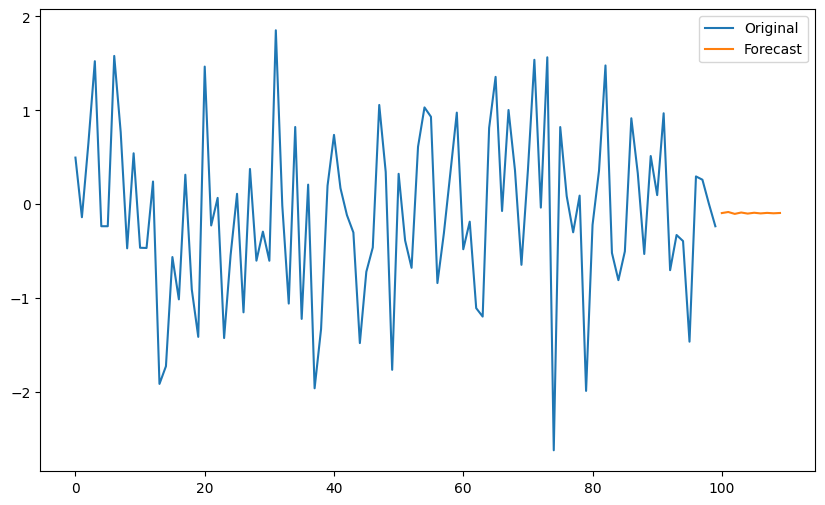

In [27]:
plt.figure(figsize=(10, 6))
plt.plot(data, label='Original')
plt.plot(pd.Series(future_values, index=range(len(data), len(data) + 10)), label='Forecast')
plt.legend()
plt.show()

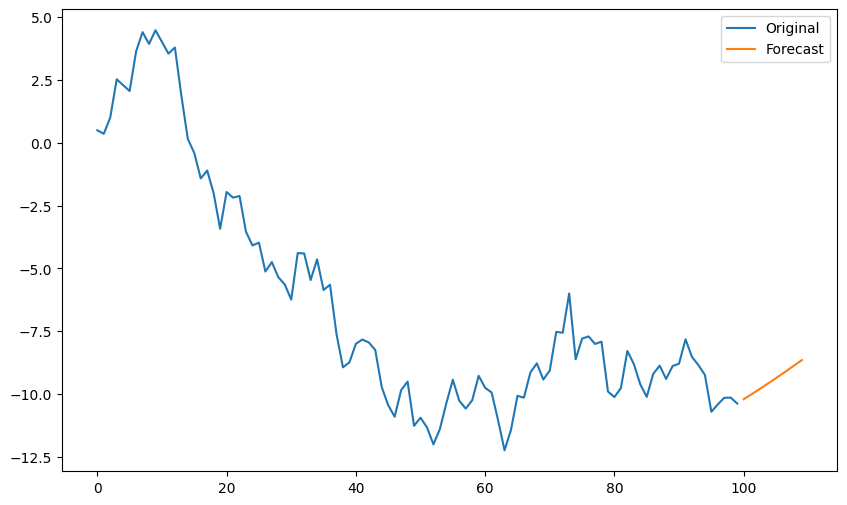

In [24]:
plt.figure(figsize=(10, 6))
plt.plot(data, label='Original')
plt.plot(pd.Series(future_values2, index=range(len(data), len(data) + 10)), label='Forecast')
plt.legend()
plt.show()